In [1]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=2)
weights = np.array([[0.1, -2.1, 1.4]])

@qml.qnode(dev)
def circuit1(weights):
    qml.RandomLayers(weights=weights, wires=range(2))
    return qml.expval(qml.Z(0))

@qml.qnode(dev)
def circuit2(weights):
    qml.RandomLayers(weights=weights, wires=range(2))
    return qml.expval(qml.Z(0))

In [2]:
np.allclose(circuit1(weights), circuit2(weights))

True

In [3]:
print(qml.draw(circuit1, level="device")(weights))

0: ──RY(0.10)──╭●───────────┤  <Z>
1: ──RX(-2.10)─╰X──RZ(1.40)─┤     


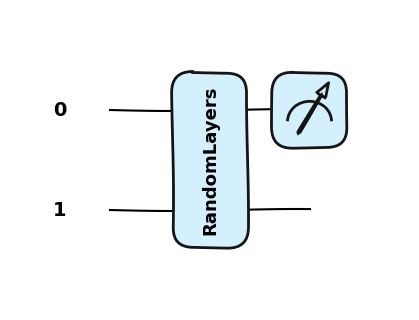

In [7]:
import matplotlib.pyplot as plt
qml.drawer.use_style("pennylane_sketch")
fig, ax = qml.draw_mpl(circuit1)(weights)
plt.show()

In [23]:
print(qml.draw(circuit2, level="device")(weights))

0: ──RY(0.25)─╭●───────────╭X──RY(0.20)───────────┤  <Z>
1: ──RX(0.08)─╰X──RZ(0.32)─╰●──RX(0.70)──RY(0.98)─┤     


In [10]:
@qml.qnode(dev)
def circuit(weights, seed=None):
    qml.RandomLayers(weights=weights, wires=range(2), seed=seed)
    return qml.expval(qml.Z(0))
np.allclose(circuit(weights, seed=9), circuit(weights, seed=12))
print(qml.draw(circuit, level="device")(weights, seed=9))
print(qml.draw(circuit, level="device")(weights, seed=12))

0: ──RZ(0.10)────────────┤  <Z>
1: ──RZ(-2.10)──RZ(1.40)─┤     
0: ─╭●─╭X──RY(0.10)──RY(-2.10)─┤  <Z>
1: ─╰X─╰●──RX(1.40)────────────┤     


In [14]:
@qml.qnode(dev)
def circuit_rnd(weights):
    qml.RandomLayers(weights=weights, wires=range(2), seed=None)
    return qml.expval(qml.Z(0))

first_call = circuit_rnd(weights)
second_call = circuit_rnd(weights)

In [15]:
np.allclose(first_call, second_call)

False

In [19]:
@qml.qnode(dev, mutable=(0,1))
def circuit_rnd(weights):
    qml.RandomLayers(weights=weights, wires=range(2), seed=None)
    return qml.expval(qml.Z(0))

first_call = circuit_rnd(weights)
second_call = circuit_rnd(weights)

/home/yangz2/anaconda3/envs/quan_cl/lib/python3.10/site-packages/pennylane/workflow/qnode.py:554: UserWarning: Received gradient_kwarg mutable, which is not included in the list of standard qnode gradient kwargs.
  warnings.warn(


In [20]:
np.allclose(first_call, second_call)

True

In [21]:
shape = qml.RandomLayers.shape(n_layers=2, n_rotations=3)
weights = np.random.random(size=shape)

/home/yangz2/anaconda3/envs/quan_cl/lib/python3.10/site-packages/pennylane/drawer/draw.py:37: PennyLaneDeprecationWarning: The 'expansion_strategy' argument is deprecated and will be removed in version 0.39. Instead, use the 'level' argument which offers more flexibility and options.
  warnings.warn(


0: ──RX(0.79)─╭●─┤  <Z>
1: ───────────╰X─┤     


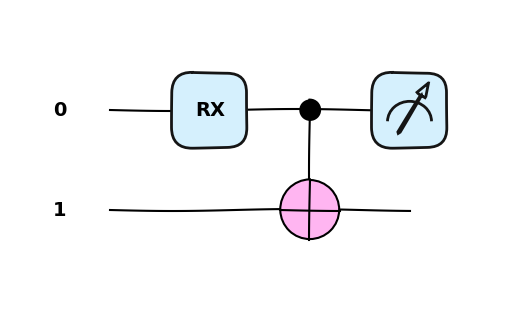

In [24]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

# Define a sample quantum circuit
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit(theta):
    qml.RX(theta, wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(0))

# Draw using qml.draw with level='device'
print(qml.draw(circuit, expansion_strategy="device")(np.pi / 4))

# Draw using qml.draw_mpl to visualize the circuit
fig, ax = qml.draw_mpl(circuit)(np.pi / 4)
plt.show()


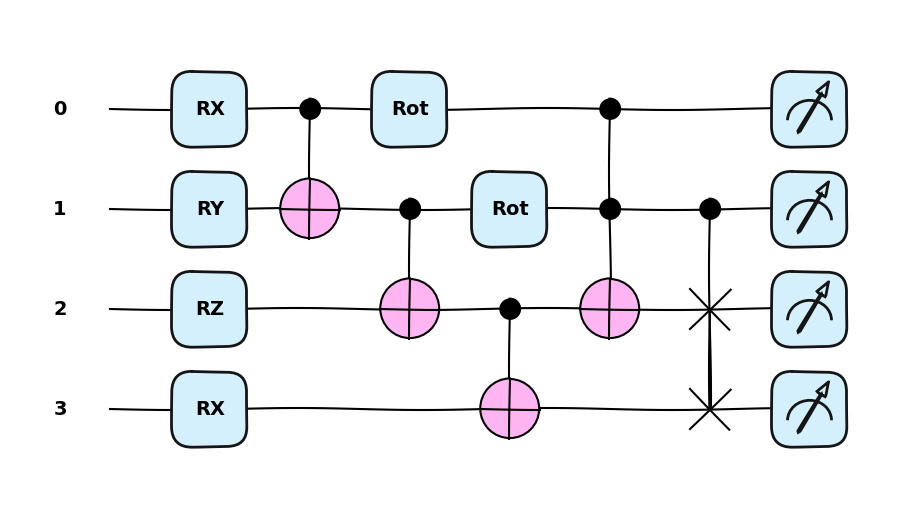

In [25]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

# 定义一个带有 4 个量子位的量子设备
dev = qml.device("default.qubit", wires=4)

# 定义量子电路
@qml.qnode(dev)
def complex_circuit(params):
    # 第一层旋转操作
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.RZ(params[2], wires=2)
    qml.RX(params[3], wires=3)

    # 纠缠操作（CNOT 门）
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    
    # 第二层旋转操作
    qml.Rot(params[4], params[5], params[6], wires=0)
    qml.Rot(params[7], params[8], params[9], wires=1)
    
    # 多量子位操作
    qml.Toffoli(wires=[0, 1, 2])
    qml.CSWAP(wires=[1, 2, 3])
    
    # 测量期望值
    return [qml.expval(qml.PauliZ(i)) for i in range(4)]

# 参数设置
params = np.random.uniform(0, 2 * np.pi, 10)

# 绘制电路并显示
fig, ax = qml.draw_mpl(complex_circuit)(params)
plt.show()


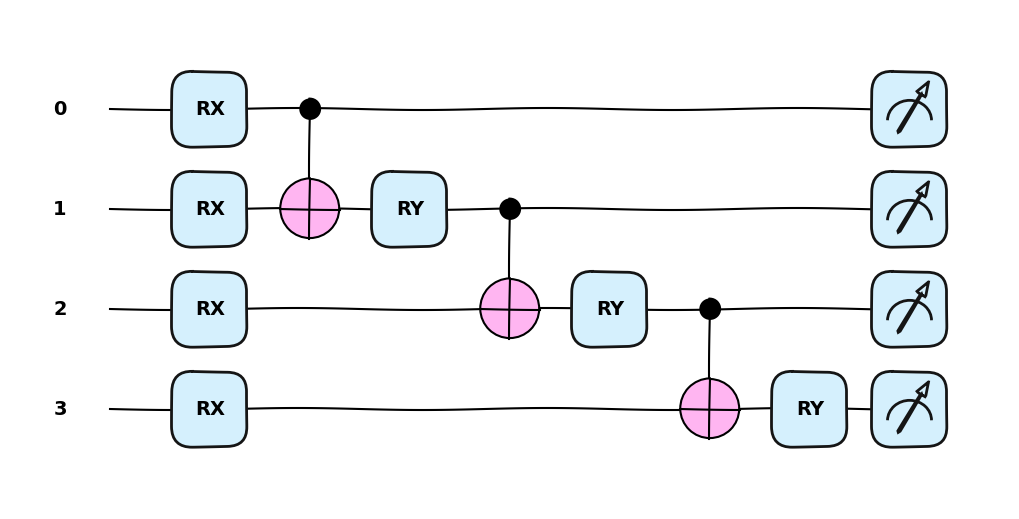

In [29]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

# 定义量子设备（4个量子位）
dev = qml.device("default.qubit", wires=4)

# 定义量子层
@qml.qnode(dev)
def quantum_layer(inputs, weights):
    # 使用输入数据对量子态进行编码
    for i in range(4):
        qml.RX(inputs[i], wires=i)

    # 添加一些可训练的参数化量子门
    qml.CNOT(wires=[0, 1])
    qml.RY(weights[0], wires=1)
    qml.CNOT(wires=[1, 2])
    qml.RY(weights[1], wires=2)
    qml.CNOT(wires=[2, 3])
    qml.RY(weights[2], wires=3)

    # 测量量子位上的 Pauli-Z 期望值
    return [qml.expval(qml.PauliZ(i)) for i in range(4)]

# 示例输入（可以是CNN中传递过来的特征）
inputs = np.random.uniform(0, np.pi, 4)
# 可训练的权重
weights = np.random.uniform(0, np.pi, 3)

# 绘制量子电路
fig, ax = qml.draw_mpl(quantum_layer)(inputs, weights)
plt.show()


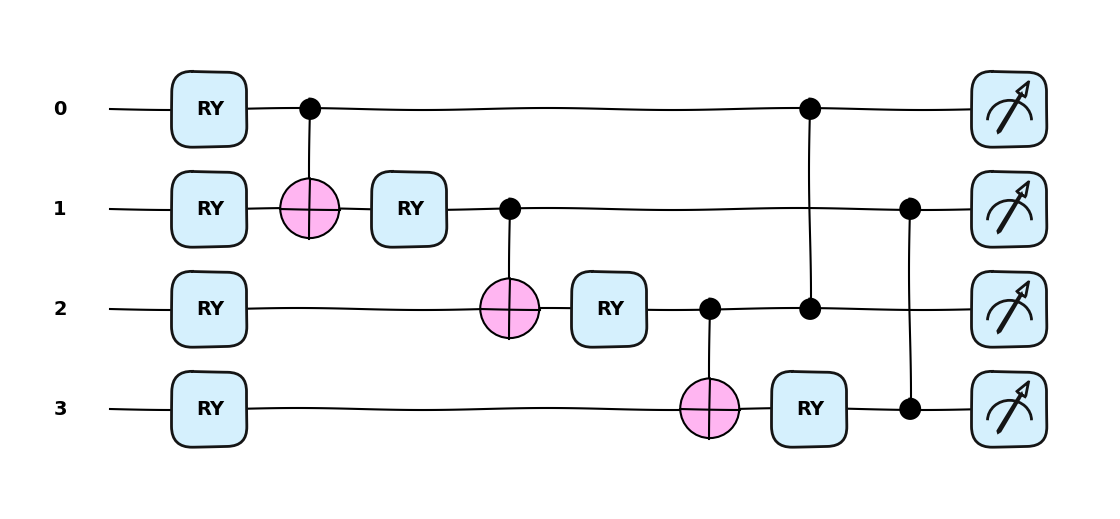

In [30]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

# 定义量子设备（使用 4 个量子位）
dev = qml.device("default.qubit", wires=4)

# 定义量子电路，作为知识蒸馏中学生模型的一部分
@qml.qnode(dev)
def quantum_distillation_circuit(inputs, weights):
    # 对输入数据进行量子态编码
    for i in range(4):
        qml.RY(inputs[i], wires=i)  # 使用RY门将经典输入编码到量子态

    # 添加可训练的参数化量子门
    qml.CNOT(wires=[0, 1])
    qml.RY(weights[0], wires=1)
    qml.CNOT(wires=[1, 2])
    qml.RY(weights[1], wires=2)
    qml.CNOT(wires=[2, 3])
    qml.RY(weights[2], wires=3)

    # 添加多量子位门
    qml.CZ(wires=[0, 2])
    qml.CZ(wires=[1, 3])

    # 测量输出结果作为学生模型的特征
    return [qml.expval(qml.PauliZ(i)) for i in range(4)]

# 示例输入（知识蒸馏中从教师模型传递的特征）
inputs = np.random.uniform(0, np.pi, 4)
# 可训练的权重
weights = np.random.uniform(0, np.pi, 3)

# 绘制量子电路
fig, ax = qml.draw_mpl(quantum_distillation_circuit)(inputs, weights)
plt.show()
